In [1]:
import json
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx as nx

import seaborn as sns
sns.set(color_codes=True)

import matplotlib.gridspec as gridspec
from scipy.cluster import hierarchy

mpl.style.use('seaborn')
%matplotlib inline

### Criterios del registro
    #RenuncieFiscal
    #VigiliaFiscal
    #FueraNestorHumbertoMartinez
    #fiscalcorrupto
    #OyeFiscalRENUNCIA
    #29E
    #29ERenuncieFiscal
    #29EVamosPorElFiscal
    #HoyMePlantoContraElFiscal

# Loader


In [2]:
#get users and mentions from the download files:
tweets_datas_path = ["renunfis_tweets_0.json"]
tw_id=[]
tw_user_id=[]
tw_user=[]
# tw_text=[]
entities_long=[]
mentioned_ids=[]
tw_device=[]# print(twits[rnd_ind]["source"])
tw_date=[]# print(twits[rnd_ind]["created_at"])


for json_file in tweets_datas_path:
    with open(json_file, "r") as tweets_file:
        for line in tweets_file:
            try:
                tweet = json.loads(line)
                tw_entities=[]
                tw_entities.extend(tweet["entities"]["user_mentions"])
                entities_long.extend(tweet["entities"]["user_mentions"])
                tw_text_loop=[tweet["text"]]
#                 if tweet["truncated"]:#=="True": # Truncated indica si el tweet es corto o largo; si truncado, busca extendido
#                     tw_text_loop=[tweet["extended_tweet"]["full_text"]]
#                     tw_entities.extend(tweet["extended_tweet"]["entities"]["user_mentions"])
#                     entities_long.extend(tweet["extended_tweet"]["entities"]["user_mentions"])
#                 else:
#                     if tweet["text"][0:2]=="RT":
#                         if tweet["retweeted_status"]["truncated"]:
#                             tw_text_loop=[tweet["retweeted_status"]["extended_tweet"]["full_text"]]
#                             tw_entities.extend(tweet["retweeted_status"]["extended_tweet"]["entities"]["user_mentions"])
#                             entities_long.extend(tweet["retweeted_status"]["extended_tweet"]["entities"]["user_mentions"])
#                         else: 
#                             tw_text_loop=[tweet["retweeted_status"]["text"]]
#                             tw_entities.extend(tweet["retweeted_status"]["entities"]["user_mentions"])
#                         if tweet["retweeted_status"]["is_quote_status"]:
#                             tw_text_loop=[tweet["extended_tweet"]["full_text"]]
#                             tw_entities.extend(tweet["retweeted_status"]["quoted_status"]["entities"]["user_mentions"])
#                             entities_long.extend(tweet["retweeted_status"]["quoted_status"]["entities"]["user_mentions"])
#                     else:
#                         tw_text_loop=[tweet["text"]]
                tw_id.append(tweet["id_str"])
                tw_user_id.append(tweet["user"]["id_str"])
                tw_user.append(tweet["user"]["screen_name"])
                mentioned_ids.append([tweet["id_str"],tweet["user"]["id_str"],list(set([ent["id_str"] for ent in tw_entities]))])
#                 tw_text.append([tweet["id_str"],tw_text_loop])
                tw_device.append(tweet["source"])
                tw_date.append(tweet["created_at"])
            except:
                continue

In [3]:
print("Tweets identificados con código     :",len(tw_id),"\n",
      "Tweets con usuario identificado     :",len(tw_user_id),"\n",
      "Tweets con nombre de usuario        :",len(tw_user),"\n",
#       "Textos de tweets recuperados        :",len(tw_text),"\n",
      "Total de Menciones en los tweets    :",len(entities_long),"\n",
      "Tweets con menciones identificadas  :",len(mentioned_ids),"\n",
      "Tweets con dispositivos registrado  :",len(tw_device),"\n",
      "Tweets con fechas registradas       :",len(tw_date),"\n"
     )

Tweets identificados con código     : 145017 
 Tweets con usuario identificado     : 145017 
 Tweets con nombre de usuario        : 145017 
 Total de Menciones en los tweets    : 163633 
 Tweets con menciones identificadas  : 145017 
 Tweets con dispositivos registrado  : 145017 
 Tweets con fechas registradas       : 145017 



In [4]:
tweets_ids=pd.DataFrame({"tw_user_id":tw_user_id,"tw_user":tw_user}, index=tw_id)
ids_freqs=pd.crosstab(index=tweets_ids.tw_user, columns="count")
ids_freqs=ids_freqs.sort_values(by=['count'] , ascending=False)["count"]
print("twiteros:",ids_freqs.shape[0])

twiteros: 38140


row_0
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>    92171
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>      22604
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                      15642
<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                 10782
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>        1594
<a href="http://www.twitter.com/noviosicopata" rel="nofollow">CabronaGold-2a</a>          664
<a href="https://twitter.com/indirectasrock" rel="nofollow">CabronaGold-2</a>             587
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       170
<a href="http://www.facebook.com/twitter" rel="nofollow">Facebook</a>                     141
<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web (M2)</a>                   130
<a href="https://ifttt.com" rel="nofollow">IFTTT</a>  

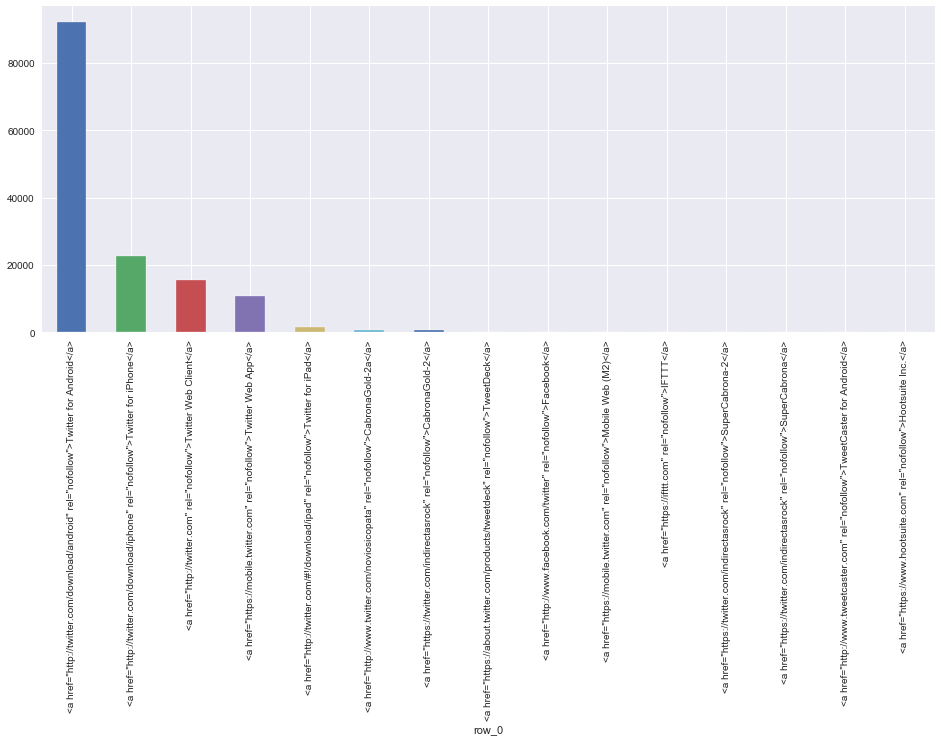

In [5]:
devices=pd.crosstab(index=np.array(tw_device), columns="count")
devices=devices.sort_values(by=['count'] , ascending=False)["count"]
devices[:15].plot(figsize=(16, 6), kind="bar")
devices[:15]

C:\Users\Alexis\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


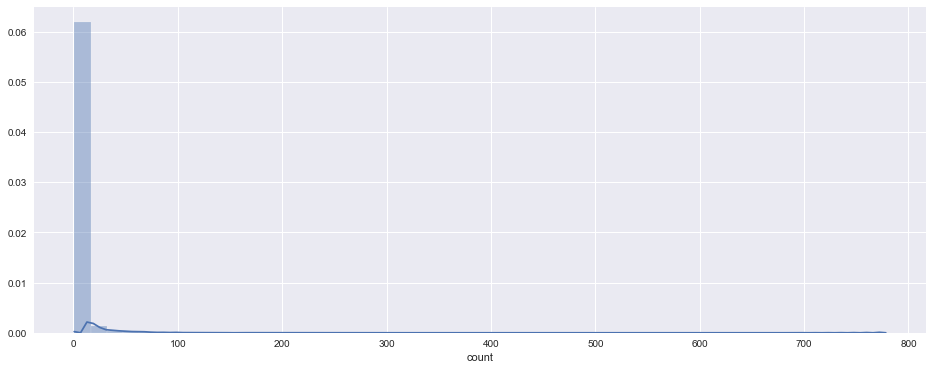

In [6]:
plt.figure(figsize=(16,6))
sns.distplot(ids_freqs)

In [7]:
round(ids_freqs.describe(),3)

count    38140.000
mean         3.802
std         12.864
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        778.000
Name: count, dtype: float64

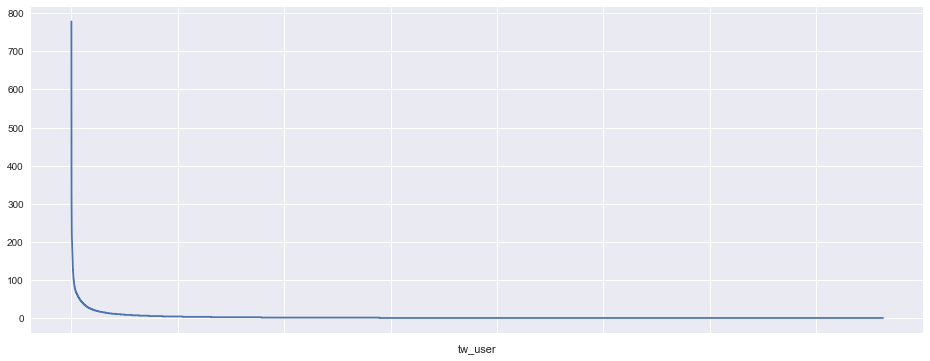

In [8]:
ids_freqs.plot(figsize=(16, 6))

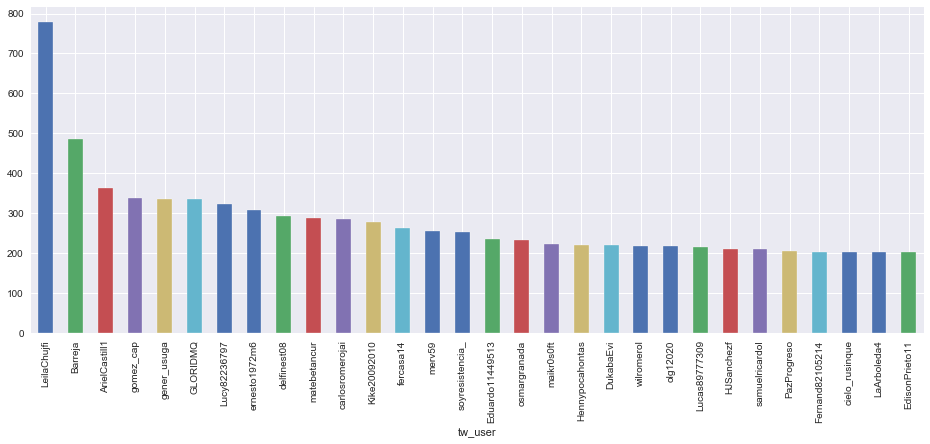

In [9]:
ids_freqs[:30].plot(figsize=(16, 6), kind="bar")
plt.savefig('top_tweeters.png')

In [10]:
ids_freqs.sort_values(ascending=False)[:60]

tw_user
LeilaChujfi        778
Barreja            486
ArielCastill1      363
gomez_cap          337
gener_usuga        336
GLORIDMQ           336
Lucy82236797       324
ernesto1972m6      308
delfinest08        294
matebetancur       289
carlosromerojai    286
Kike20092010       277
fercasa14          262
merv59             256
soyresistencia_    252
Eduardo11449513    236
osmargranada       233
maikr0s0ft         223
Hennypocahontas    220
DukabaEvi          219
wilromerol         218
olg12020           217
Lucas89777309      214
HJSanchezf         210
samuelricardol     209
PazProgreso        205
Fernand82105214    203
cielo_rusinque     203
LaArboleda4        203
EdisonPrieto11     202
Ramiro6668         200
JoseNorbertoCa1    200
CarlosDuvanSal1    194
FabianSanabriaS    190
OctavioLopezSie    189
kalimann56         189
henry_guarnizo     189
davamara16         187
Yarokamena         182
NayibeOrdonez      181
Fernand80369012    177
AnakareriNannaE    177
nicosuuno2012      175
aar

In [11]:
uniq_ids=list(set([entit["id_str"]for entit in entities_long]))
len(uniq_ids)

4941

In [12]:
ments_df=pd.DataFrame([[entit["id_str"],
                        entit["screen_name"],
                        entit["name"]
                       ]for entit in entities_long],
                     columns=["id_str","screen_name","name"])

In [13]:
ments_freq=pd.crosstab(index=ments_df.screen_name, columns="count")
ments_freq=ments_freq.sort_values(by=['count'] , ascending=False)
print("Cuentas mencionadas",ments_freq.shape[0])

Cuentas mencionadas 4951


# Clustering Nexos¶


In [14]:
# Tabla de ocurrencia de menciones por tuit
id_ments=pd.crosstab(np.array([tw_mnt for tw_mntns in mentioned_ids for tw_mnt in tw_mntns[2] ]), columns="count").sort_values(ascending=False, by="count")

In [15]:
top_n=300

In [16]:
ments_ids_top=list(id_ments.index[:top_n])

In [17]:
mntns_top_ocurr=np.array([[cand in tw_mntns[2] for cand in ments_ids_top]for tw_mntns in mentioned_ids])

In [18]:
mntns_top_ocurr.shape

(145017, 300)

In [19]:
names_mnts_top=[]
for usr_id in id_ments.index[:top_n]:
    name=""
    try:
        name=ments_df[ments_df.id_str==usr_id].screen_name.iloc[0]
    except:
        name="Unknown"
#     print(usr_id, name)
    names_mnts_top.append(name)
        
#     print(usr_id,tweets_ids[tweets_ids.tw_user_id==usr_id].tw_user.iloc[0])

In [20]:
# twtxt_ids=[txt_id[0] for txt_id in tw_text] # Id del tuit con el texto
df_mntns_top_ocurr=pd.DataFrame(mntns_top_ocurr,columns=names_mnts_top, index=tw_id)

MafeCarrascal      8531
Marianiniecheve    7202
CathyJuvinao       6328
VillegasPoljak     4720
ClaudiaLopez       4648
cielo_rusinque     3649
angelamrobledo     3469
FiscaliaCol        2931
Uriasv             2818
FabianSanabriaS    2797
OliverLopezCano    2454
AngelicaLozanoC    2388
DanielSamperO      2319
gener_usuga        2242
GustavoBolivar     1931
PoliciaColombia    1677
JERobledo          1600
petrogustavo       1591
ANNALVAREZG        1562
NoticiasUno        1498
dtype: int64


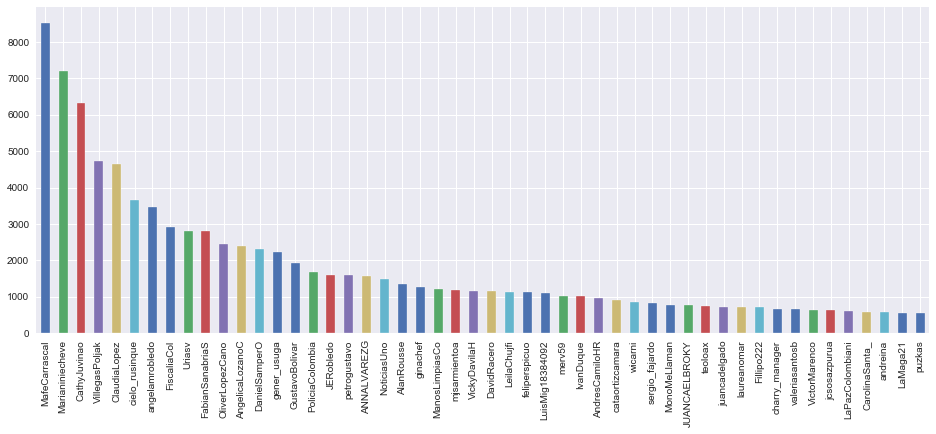

In [21]:
plt.figure(figsize=(16,6))
print (df_mntns_top_ocurr.sum(axis=0).sort_values(ascending=False)[:20])
df_mntns_top_ocurr.sum(axis=0).sort_values(ascending=False)[:50].plot(kind="bar")
plt.savefig('top_mentions.png')

In [22]:
# mntns_ward= hierarchy.linkage(df_mntns_top_ocurr.transpose(), 'ward')

In [23]:
# #max_d = 10
# plt.figure(figsize=(10,100))
# #plt.figure()
# dn = hierarchy.dendrogram(mntns_ward,orientation="left", labels=names_mnts_top)
# #plt.axhline(y=max_d, c='k')
# plt.title('Ward Link Dendrogram por tweets')
# plt.yticks(fontsize=16)
# plt.savefig('dendrograma_ward_link_mentions.png')
# plt.show()

# Relaciones de cuentas

In [24]:
directed_graph_df=df_mntns_top_ocurr.groupby(tw_user).aggregate(sum)

In [25]:
mntns_ward_usr= hierarchy.linkage(directed_graph_df.transpose(), 'ward')

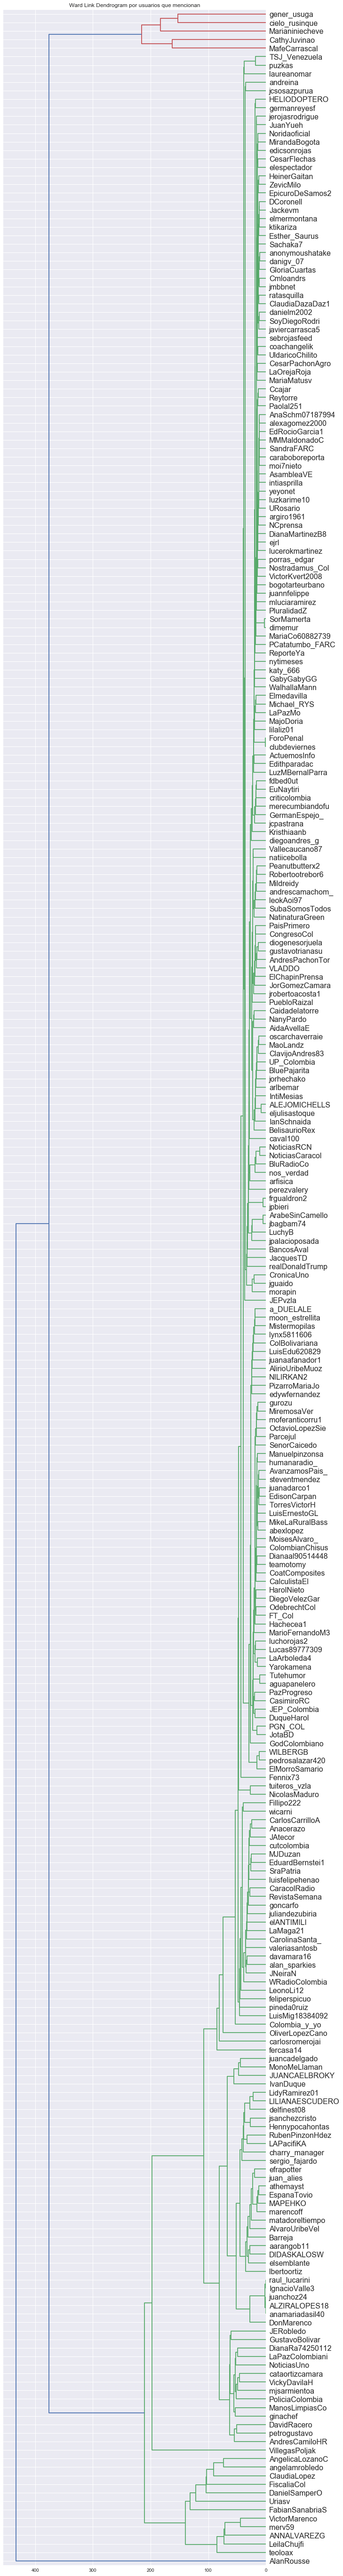

In [26]:
#max_d = 10
plt.figure(figsize=(10,100))
#plt.figure()
dn = hierarchy.dendrogram(mntns_ward_usr,orientation="left", labels=names_mnts_top)
#plt.axhline(y=max_d, c='k')
plt.title('Ward Link Dendrogram por usuarios que mencionan')
plt.yticks(fontsize=16)
# plt.savefig('dendrograma_ward_link_mentions.png')
plt.show()

In [27]:
directed_graph_df.sum(axis=1).sort_values(ascending=False)[:50]#Mayores tuiteros

LeilaChujfi        686.0
Barreja            524.0
merv59             409.0
GLORIDMQ           360.0
ernesto1972m6      313.0
gener_usuga        302.0
ArielCastill1      297.0
Lucy82236797       282.0
matebetancur       279.0
gomez_cap          263.0
fercasa14          255.0
Kike20092010       249.0
olg12020           248.0
osmargranada       233.0
Eduardo11449513    227.0
Hennypocahontas    221.0
AnakareriNannaE    219.0
ANNALVAREZG        218.0
JoseNorbertoCa1    218.0
wilromerol         216.0
samuelricardol     211.0
Ramiro6668         210.0
CarlosDuvanSal1    210.0
FabianSanabriaS    209.0
PazProgreso        209.0
LaArboleda4        209.0
OctavioLopezSie    205.0
HJSanchezf         202.0
cielo_rusinque     201.0
Fernand80369012    199.0
henry_guarnizo     194.0
soyresistencia_    192.0
Lucas89777309      192.0
kalimann56         175.0
DukabaEvi          171.0
chinvila23         170.0
maikr0s0ft         168.0
bedoyarendon       166.0
mjrmora            164.0
wicarni            160.0


In [28]:
directed_graph_df.sum(axis=0).sort_values(ascending=False)[:50]#Los más tuiteados

MafeCarrascal      8531.0
Marianiniecheve    7202.0
CathyJuvinao       6328.0
VillegasPoljak     4720.0
ClaudiaLopez       4648.0
cielo_rusinque     3649.0
angelamrobledo     3469.0
FiscaliaCol        2931.0
Uriasv             2818.0
FabianSanabriaS    2797.0
OliverLopezCano    2454.0
AngelicaLozanoC    2388.0
DanielSamperO      2319.0
gener_usuga        2242.0
GustavoBolivar     1931.0
PoliciaColombia    1677.0
JERobledo          1600.0
petrogustavo       1591.0
ANNALVAREZG        1562.0
NoticiasUno        1498.0
AlanRousse         1358.0
ginachef           1270.0
ManosLimpiasCo     1211.0
mjsarmientoa       1176.0
VickyDavilaH       1165.0
DavidRacero        1149.0
LeilaChujfi        1130.0
feliperspicuo      1130.0
LuisMig18384092    1098.0
merv59             1038.0
IvanDuque          1021.0
AndresCamiloHR      977.0
cataortizcamara     928.0
wicarni             850.0
sergio_fajardo      840.0
MonoMeLlaman        782.0
JUANCAELBROKY       781.0
teoloax             745.0
juancadelgad

# Temporalidad

In [29]:
tw_fechas_df=pd.DataFrame(np.column_stack([tw_user,tw_date]))
tw_fechas_df.columns=["user","date_tweet"]
tw_fechas_df["date_tweet"]=pd.to_datetime(tw_fechas_df['date_tweet'], utc=True)#.tz_convert('US/Eastern')
tw_fechas_df.set_index('date_tweet', inplace=True)#.tz_convert('US/Eastern')
tw_fechas_df.index=tw_fechas_df.index.tz_convert('US/Eastern')
tw_fechas_df["ocurr"]=1

In [30]:
time_sample="600S"

In [31]:
tot_tw_fechas=tw_fechas_df.ocurr.resample(time_sample).sum()

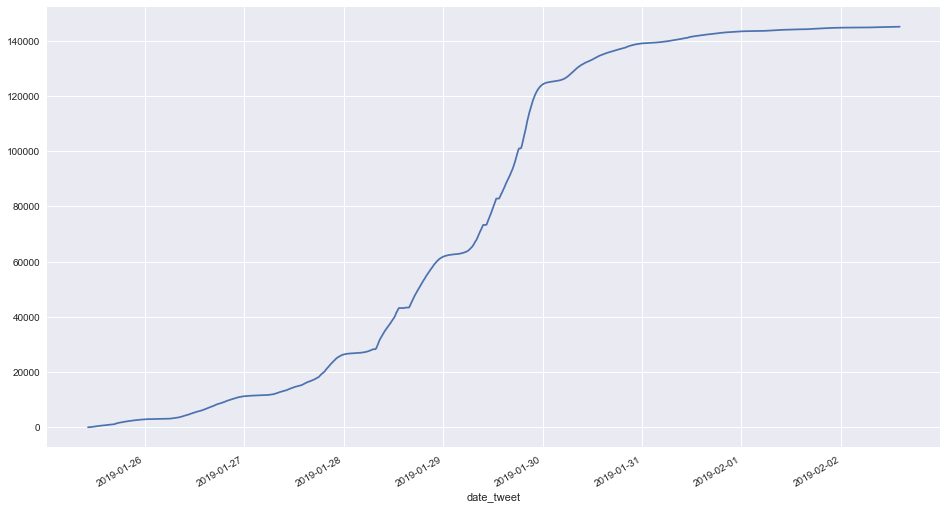

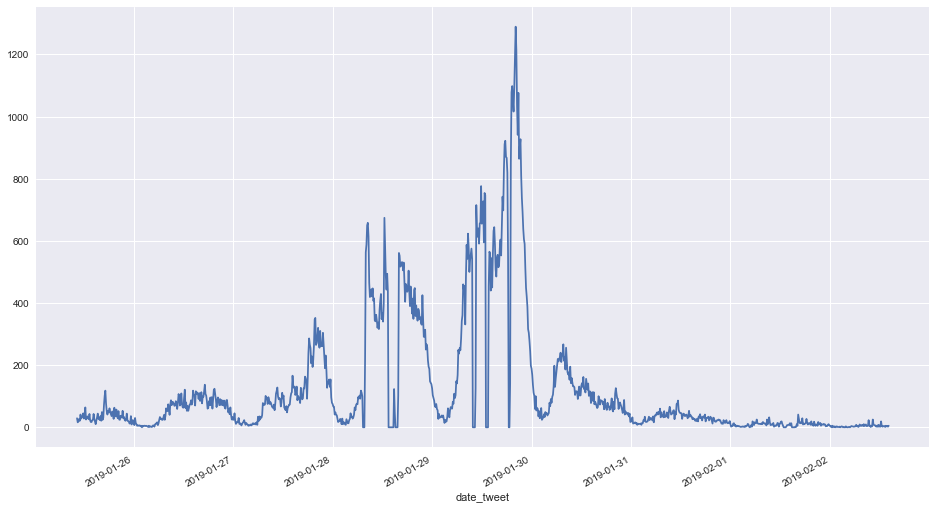

In [32]:
plt.figure(figsize=(16,9))
tot_tw_fechas.cumsum().plot()#kind="bar")
plt.show()

plt.figure(figsize=(16,9))
tot_tw_fechas.plot()#kind="bar")
plt.show()

In [33]:
mayor_tweeters=list(directed_graph_df.sum(axis=1).sort_values(ascending=False).index[:10])

In [34]:
tw_fechas_df_top=tw_fechas_df[tw_fechas_df.user.isin(mayor_tweeters)]
#tw_fechas_df_filt.head(20)

In [35]:
twits_filt=pd.crosstab(index=tw_fechas_df_top.index,
                  columns=tw_fechas_df_top["user"])
twits_filt=twits_filt.resample(time_sample).sum()

user
LeilaChujfi      778
Barreja          486
ArielCastill1    363
gomez_cap        337
gener_usuga      336
GLORIDMQ         336
Lucy82236797     324
ernesto1972m6    308
matebetancur     289
merv59           256
dtype: int64

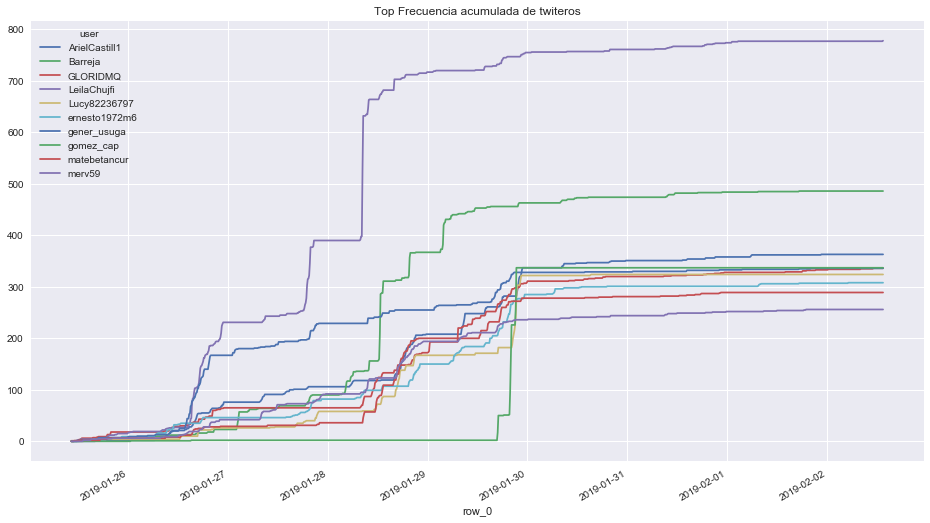

In [36]:
twits_filt.cumsum().plot(figsize=(16,9), title=("Top Frecuencia acumulada de twiteros"))
twits_filt.sum(axis=0).sort_values(ascending=False)[:10]

In [37]:
top_ments_df=df_mntns_top_ocurr.copy()*1
top_ments_df.index=tw_fechas_df.index
# top_ments_df.head(20)

In [38]:
top_ments_df_day=top_ments_df.iloc[:,:10].resample(time_sample).sum()
top_ments_df_day.sum(axis=0)

MafeCarrascal      8531
Marianiniecheve    7202
CathyJuvinao       6328
VillegasPoljak     4720
ClaudiaLopez       4648
cielo_rusinque     3649
angelamrobledo     3469
FiscaliaCol        2931
Uriasv             2818
FabianSanabriaS    2797
dtype: int64

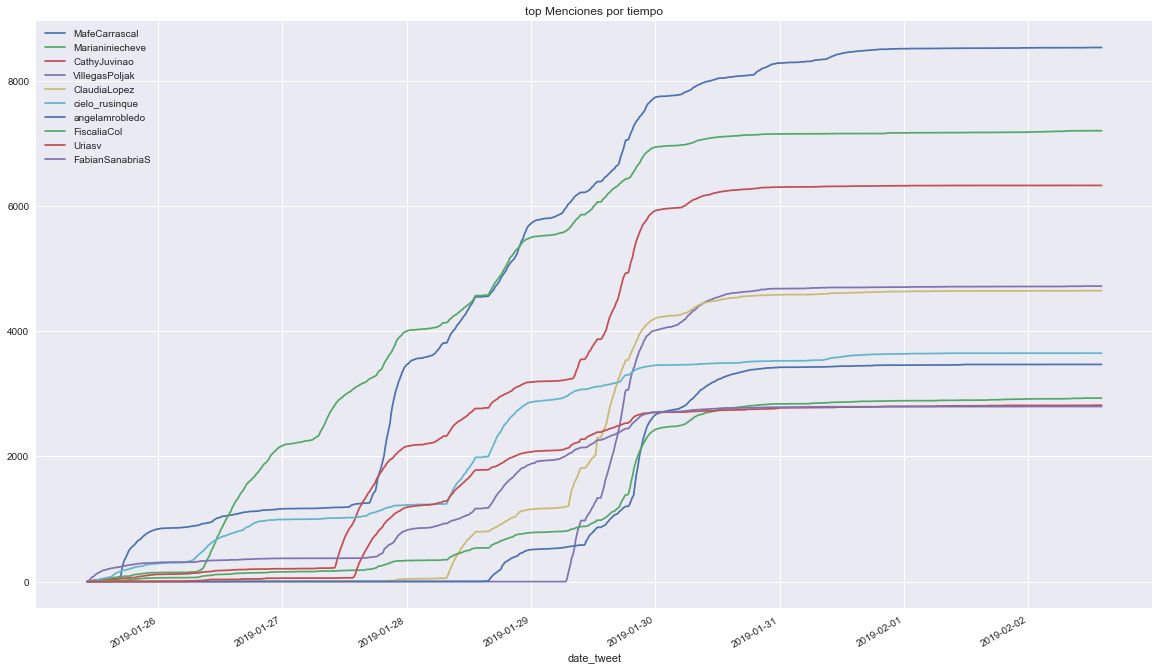

In [39]:
top_ments_df_day.cumsum().plot(figsize=(20,12), title="top Menciones por tiempo")
# (tot_tw_fechas.cumsum()*max(top_ments_df_day.sum(axis=0))/max(tot_tw_fechas.cumsum())).plot(color="black", linestyle='dashed')#kind="bar")

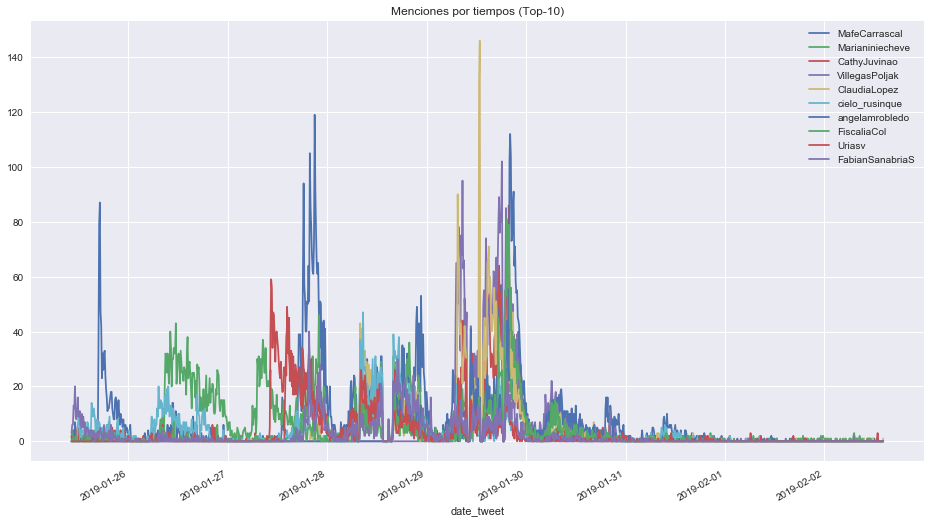

In [40]:
top_ments_df_day.plot(figsize=(16,9), title="Menciones por tiempos (Top-10)")

# Grafos

In [41]:
mat_size=40
graph_mat=directed_graph_df.loc[directed_graph_df.sum(axis=1).sort_values(ascending=False).index[:mat_size],
                                directed_graph_df.sum(axis=0).sort_values(ascending=False).index[:mat_size]
                               ]
graph_mat.head()

,MafeCarrascal,Marianiniecheve,CathyJuvinao,VillegasPoljak,ClaudiaLopez,cielo_rusinque,angelamrobledo,FiscaliaCol,Uriasv,FabianSanabriaS,...,IvanDuque,AndresCamiloHR,cataortizcamara,wicarni,sergio_fajardo,MonoMeLlaman,JUANCAELBROKY,teoloax,juancadelgado,laureanomar
LeilaChujfi,10.0,20.0,4.0,1.0,2.0,55.0,5.0,10.0,7.0,13.0,...,8.0,1.0,1.0,3.0,2.0,10.0,6.0,14.0,17.0,0.0
Barreja,5.0,16.0,0.0,0.0,2.0,22.0,2.0,7.0,8.0,18.0,...,5.0,3.0,1.0,0.0,3.0,6.0,5.0,10.0,8.0,0.0
merv59,3.0,25.0,1.0,0.0,1.0,24.0,1.0,2.0,2.0,5.0,...,4.0,0.0,0.0,0.0,1.0,2.0,3.0,11.0,14.0,0.0
GLORIDMQ,7.0,16.0,4.0,0.0,3.0,33.0,4.0,4.0,4.0,10.0,...,5.0,1.0,2.0,1.0,4.0,5.0,6.0,4.0,6.0,0.0
ernesto1972m6,13.0,27.0,9.0,0.0,5.0,11.0,2.0,4.0,2.0,2.0,...,5.0,4.0,2.0,1.0,1.0,3.0,1.0,0.0,6.0,0.0


In [42]:
graph_df=graph_mat.melt()
graph_df.columns=["tw_para", "freq"]
graph_df["tw_de"]=[usr for i in range(int(len(graph_df)/len(graph_mat.index)))for usr in list(graph_mat.index)]
graph_df=graph_df.loc[:,["tw_de","tw_para","freq"]]

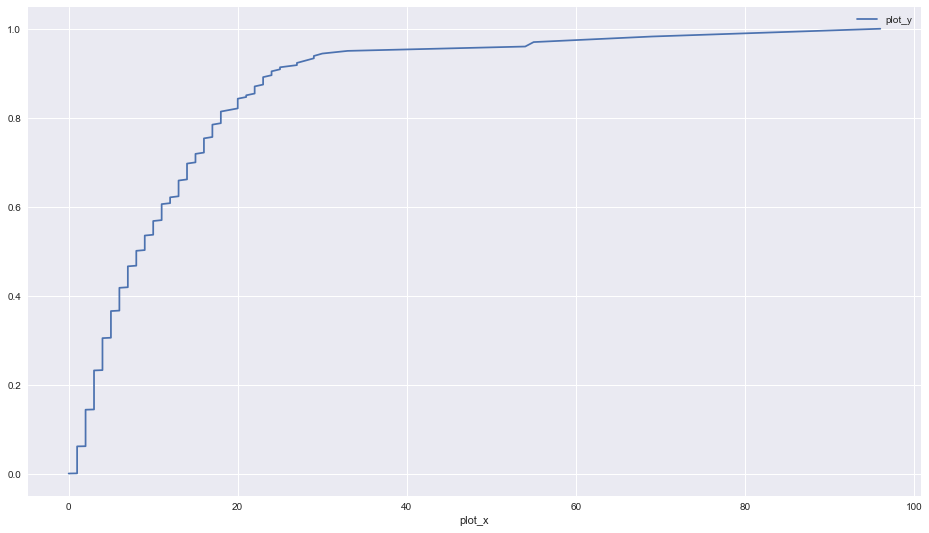

In [43]:
plot_x=np.array(list(graph_df.freq.sort_values(ascending=True)))
plot_y=np.cumsum(plot_x)/sum(plot_x)
cum_freq=pd.DataFrame({"plot_x":plot_x,
                       "plot_y":plot_y})
cum_freq.plot(x="plot_x",
              y="plot_y",
             figsize=(16,9))

In [48]:
min_crit_tw=cum_freq[cum_freq.plot_y>=.6].iloc[0,0]
graph_df_filt=graph_df.loc[graph_df.freq>=min_crit_tw,:]
mx_fr=max(graph_df_filt.freq)
print(min_crit_tw)
print(len(graph_df_filt))
graph_df_filt.sort_values("freq",ascending=False)#.head(20)

11.0
132


,tw_de,tw_para,freq
525,gener_usuga,gener_usuga,96.0
383,FabianSanabriaS,FabianSanabriaS,69.0
200,LeilaChujfi,cielo_rusinque,55.0
1040,LeilaChujfi,LeilaChujfi,54.0
203,GLORIDMQ,cielo_rusinque,33.0
228,cielo_rusinque,cielo_rusinque,30.0
1042,merv59,LeilaChujfi,29.0
528,matebetancur,gener_usuga,29.0
47,Lucy82236797,Marianiniecheve,28.0
44,ernesto1972m6,Marianiniecheve,27.0


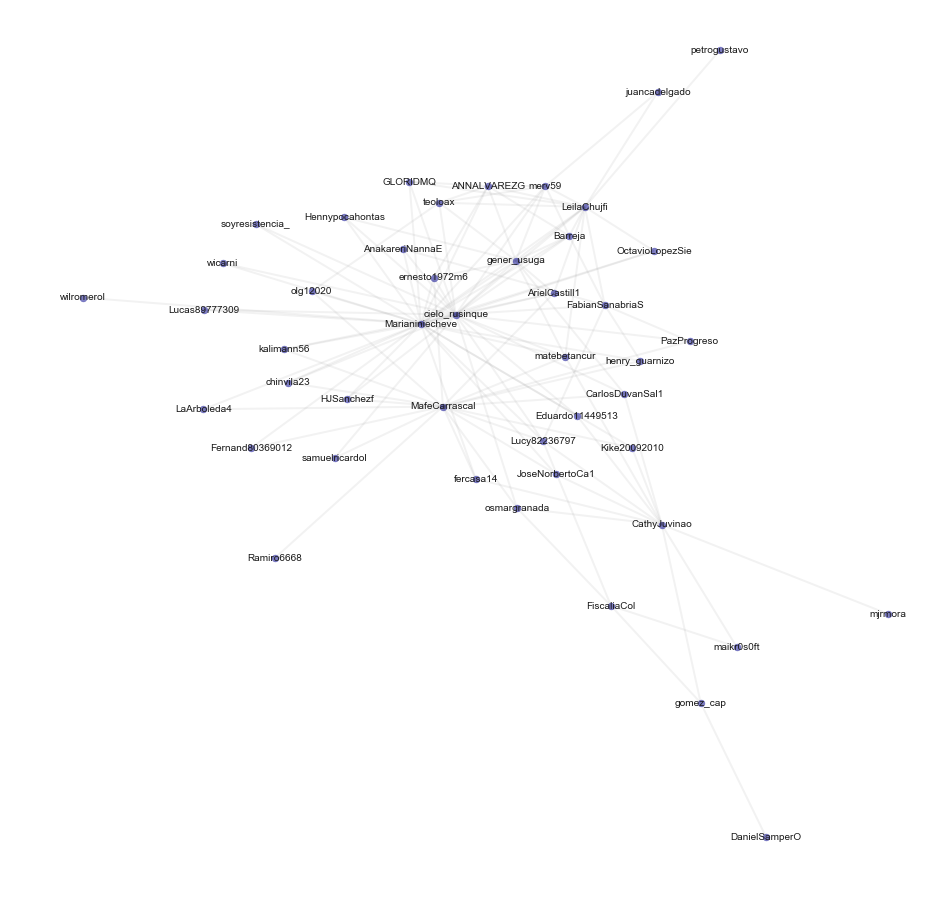

In [49]:
G_2= nx.Graph()#nx.generators.directed.random_k_out_graph(10, 3, 0.5)
for i, elrow in graph_df_filt.iterrows():
    G_2.add_edge(elrow[0], elrow[1])

pos_2 = nx.layout.spring_layout(G_2)

plt.figure(figsize=(16,16))
edges = nx.draw_networkx_edges(G_2, pos_2, edge_color="gray", alpha=.1, width=2)
nodes = nx.draw_networkx_nodes(G_2, pos_2, node_size=50, node_color='darkblue', alpha=.5)
labels = nx.draw_networkx_labels(G_2, pos_2, font_size=10)
ax = plt.gca()
ax.set_axis_off()
plt.show()

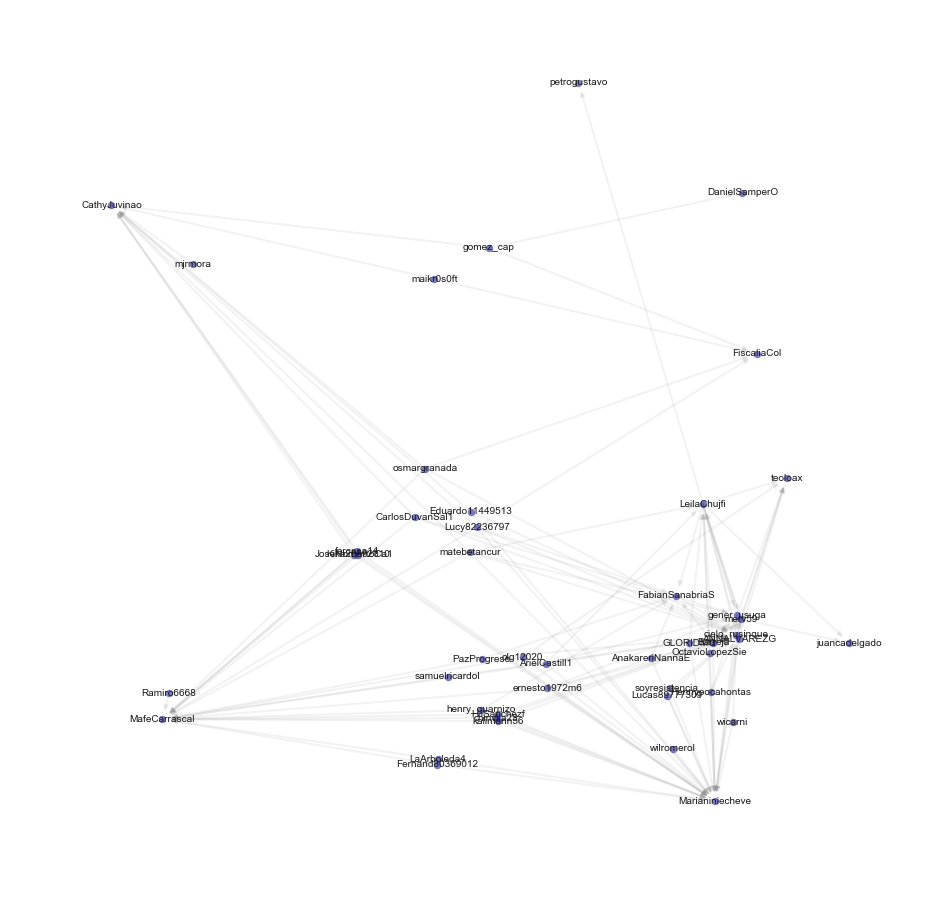

In [50]:
plt.figure(figsize=(16,16))
G_1= nx.DiGraph()
for i, elrow in graph_df_filt.iterrows():
    G_1.add_edge(elrow[0], elrow[1])

pos_1 = nx.layout.spring_layout(G_1)

edges = nx.draw_networkx_edges(G_1, pos_1, edge_color="gray", alpha=.1, width=2)
nodes = nx.draw_networkx_nodes(G_1, pos_1, node_size=50, node_color='darkblue', alpha=.5)
labels = nx.draw_networkx_labels(G_1, pos_1, font_size=10)
ax = plt.gca()
ax.set_axis_off()
plt.show()

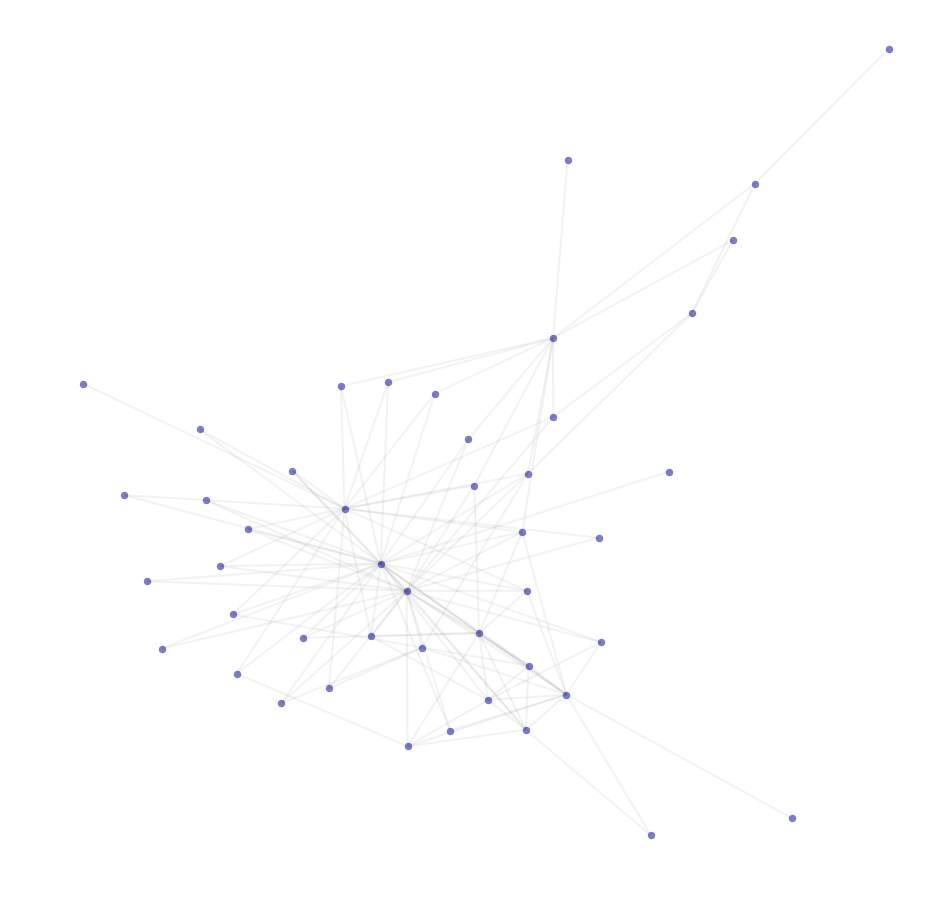

In [51]:
plt.figure(figsize=(16,16))
G_3= nx.Graph()
for i, elrow in graph_df_filt.iterrows():
    G_3.add_edge(elrow[0], elrow[1])

pos_3 = nx.layout.spring_layout(G_3)

edges = nx.draw_networkx_edges(G_3, pos_3, edge_color="gray", alpha=.1, width=2)
nodes = nx.draw_networkx_nodes(G_3, pos_3, node_size=50, node_color='darkblue', alpha=.5)
# labels = nx.draw_networkx_labels(G_3, pos_3, font_size=10)
ax = plt.gca()
ax.set_axis_off()
plt.show()